In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


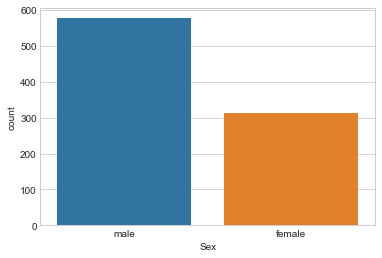

In [6]:
sns.countplot(x='Sex',data=df)

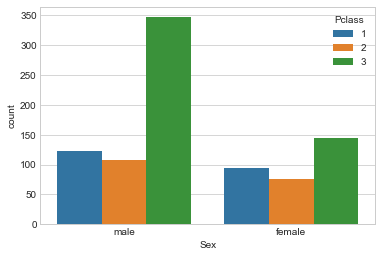

In [21]:
sns.countplot(x='Sex',data=df,hue='Pclass')

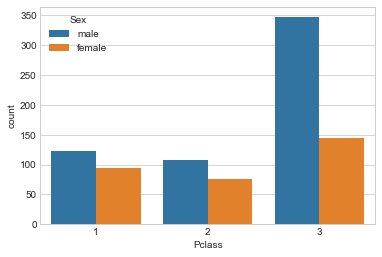

In [22]:
sns.countplot(x='Pclass',data=df,hue='Sex')

In [23]:
def male_female_child(parameter):
    age,sex = parameter
    if age < 16:
        return 'child'
    else:
        return sex

In [24]:
df['Person'] = df[['Age','Sex']].apply(male_female_child,axis=1)

In [25]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


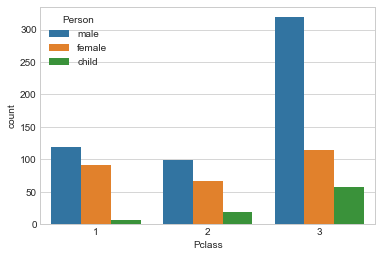

In [34]:
sns.countplot(x='Pclass',data=df,hue='Person')

In [28]:
df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

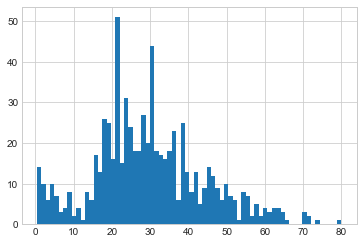

In [30]:
df['Age'].hist(bins=70)

In [31]:
df['Age'].mean()

29.69911764705882

In [39]:
df[df['Pclass'] == 2]['Age'].mean()

29.87763005780347

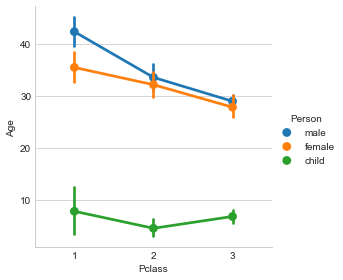

In [44]:
sns.factorplot(x='Pclass',y='Age',hue='Person',data = df)

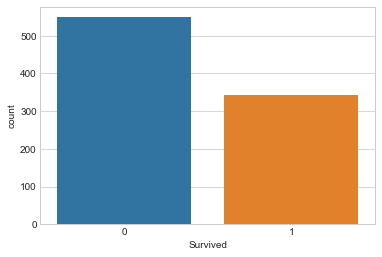

In [45]:
sns.countplot(x='Survived',data=df)

In [46]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

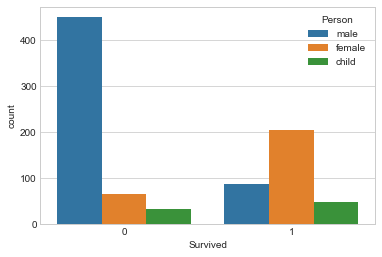

In [47]:
sns.countplot(x='Survived',hue='Person',data=df)

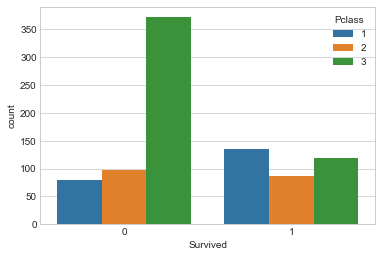

In [48]:
sns.countplot(x='Survived',hue='Pclass',data=df)

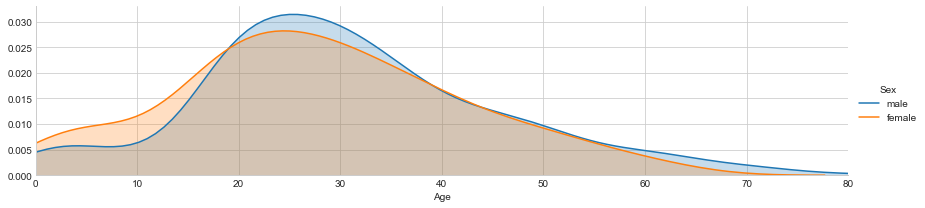

In [53]:
fig = sns.FacetGrid(df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
old = df['Age'].max()
fig.set(xlim=(0,old))
fig.add_legend()

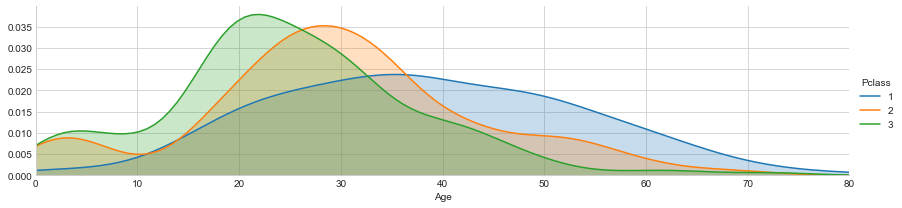

In [55]:
fig = sns.FacetGrid(df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
old = df['Age'].max()
fig.set(xlim=(0,old))
fig.add_legend()

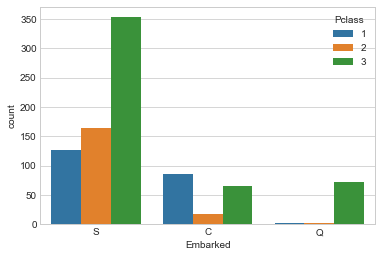

In [57]:
sns.countplot('Embarked',hue='Pclass',data=df)

In [58]:
def find_alone(para):
    sib,par = para
    if sib==0 and par==0:
        return 'alone'
    else:
        return 'notAlone'

df['Alone'] = df[['SibSp','Parch']].apply(find_alone,axis=1)

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,notAlone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,notAlone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,notAlone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone


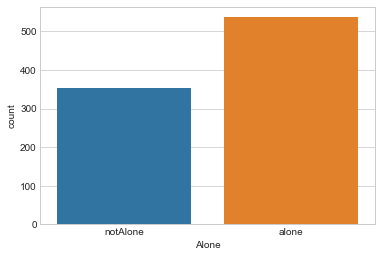

In [60]:
sns.countplot('Alone',data=df)

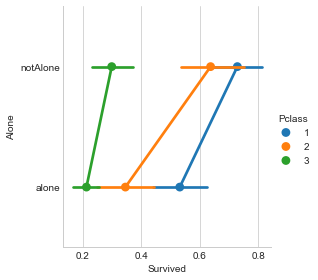

In [62]:
sns.factorplot(x='Survived',y='Alone',hue='Pclass',data=df)

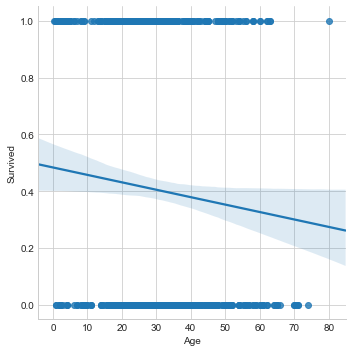

In [65]:
sns.lmplot('Age','Survived',df)

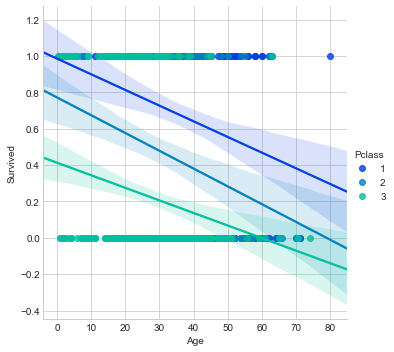

In [67]:
sns.lmplot('Age','Survived',hue='Pclass',data=df,palette='winter')

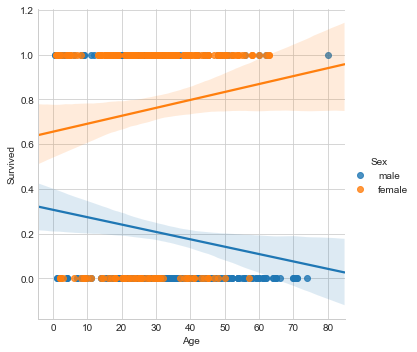

In [70]:
sns.lmplot('Age','Survived',hue='Sex',data=df)